<a href="https://colab.research.google.com/github/mennaHassanin/Exploratory_Data_Analysis/blob/main/Diabetes_Modelsmplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from xgboost import XGBClassifier

## Import Dataset

In [ ]:
!kaggle datasets download -d nancyalaswad90/review

Dataset URL: https://www.kaggle.com/datasets/nancyalaswad90/review
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 687kB/s]


In [ ]:
! unzip /content/review.zip

Archive:  /content/review.zip
  inflating: diabetes.csv            


In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## EDA

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


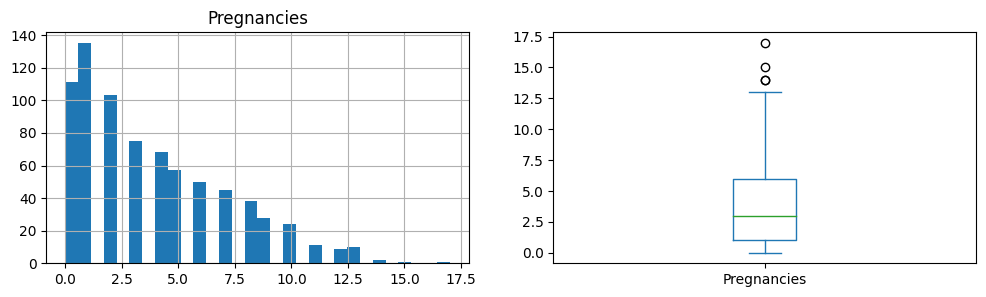

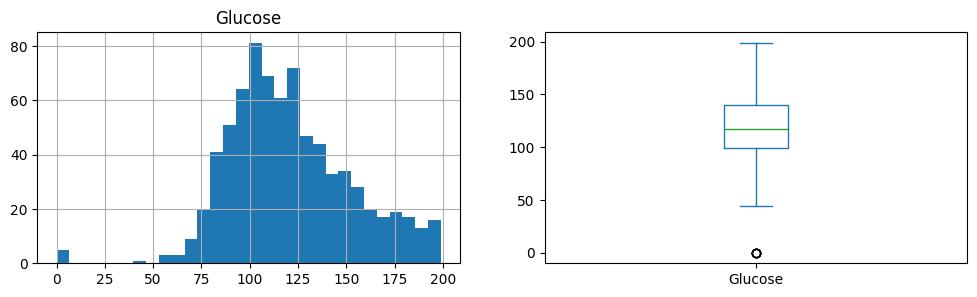

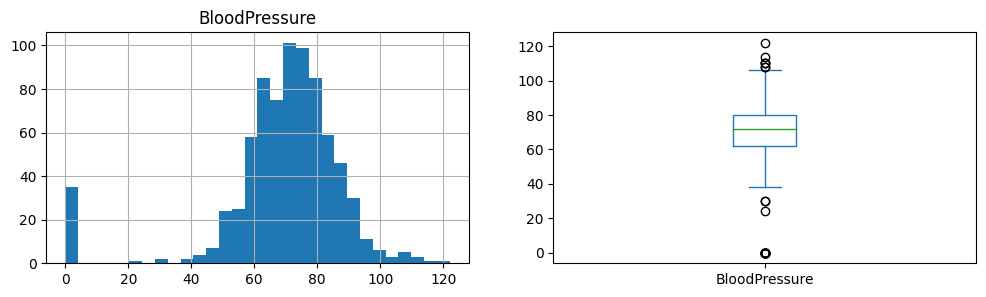

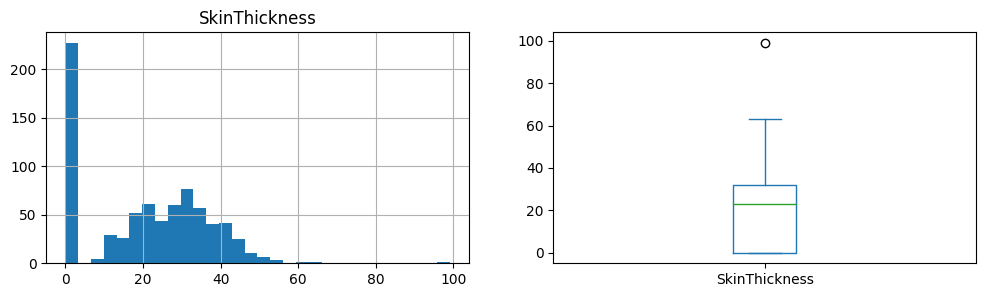

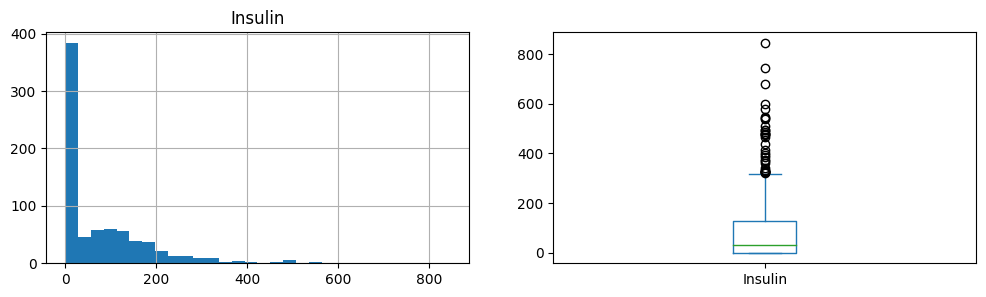

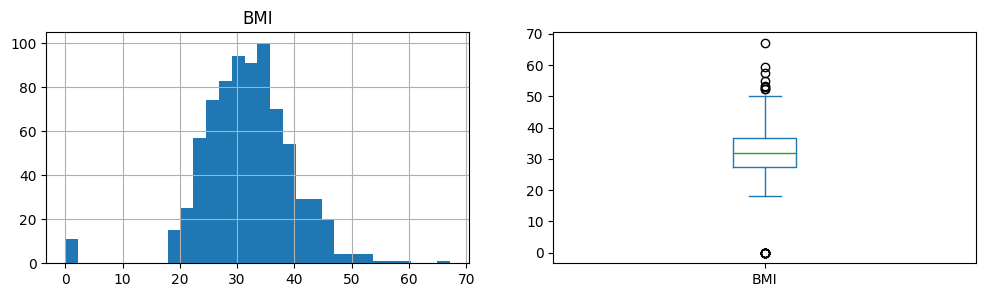

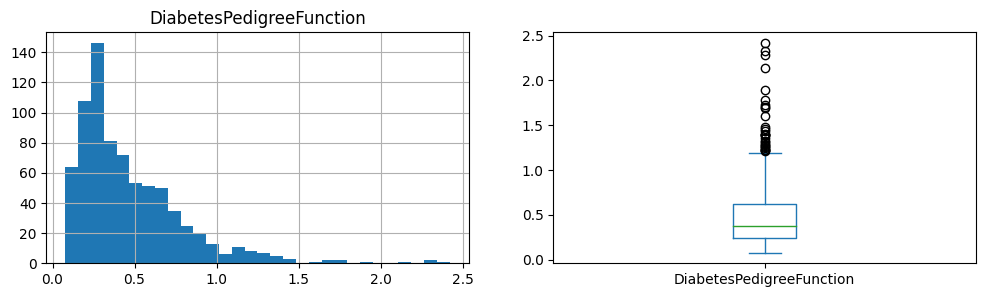

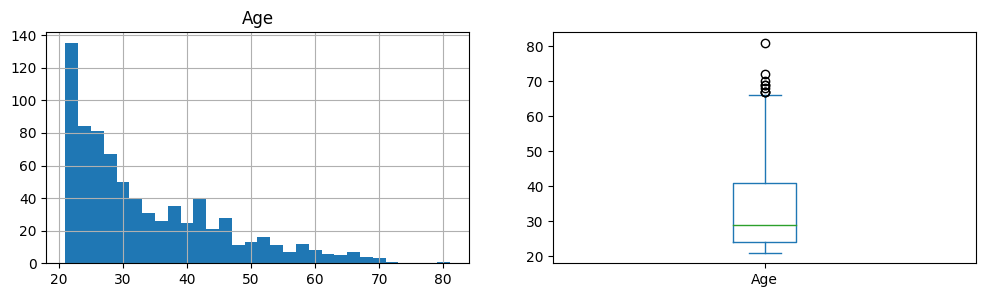

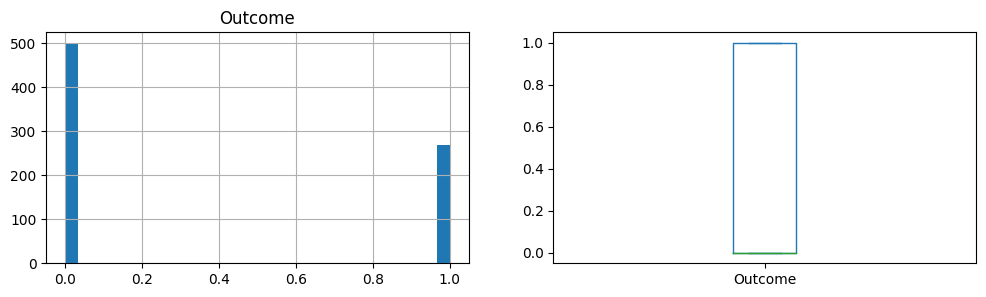

In [ ]:
for col in  df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 2, 1)
    df[col].hist(bins=30)
    plt.title(col)

    plt.subplot(1, 2, 2)
    df[col].plot(kind='box')

    plt.show()

In [ ]:
#to solve outliers
for col in df.columns[:-1]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

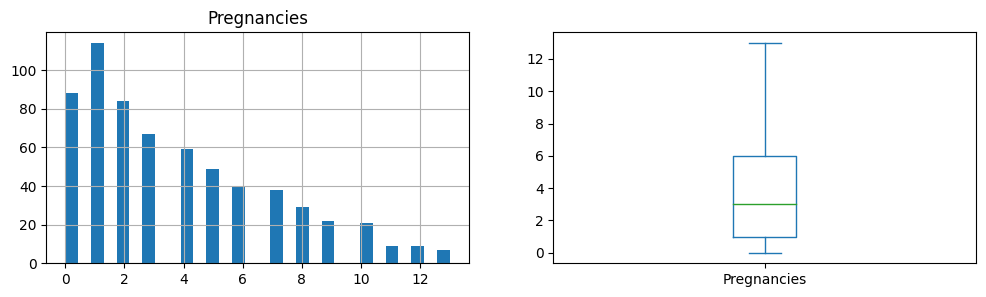

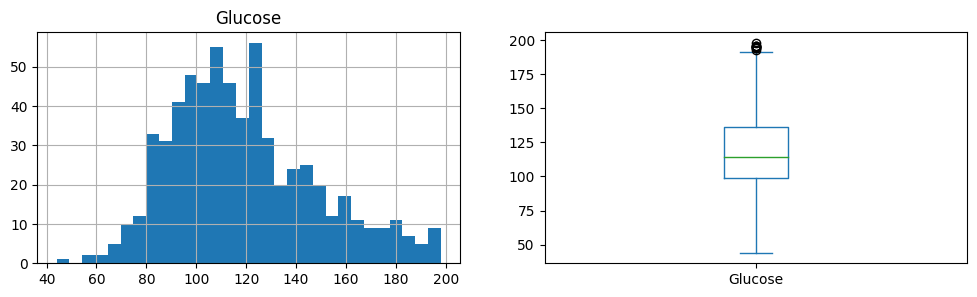

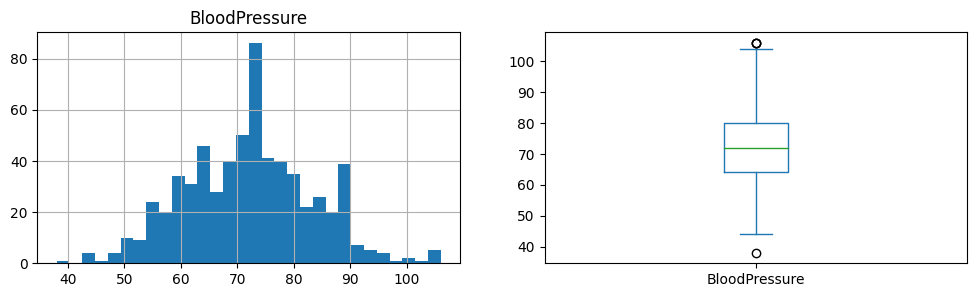

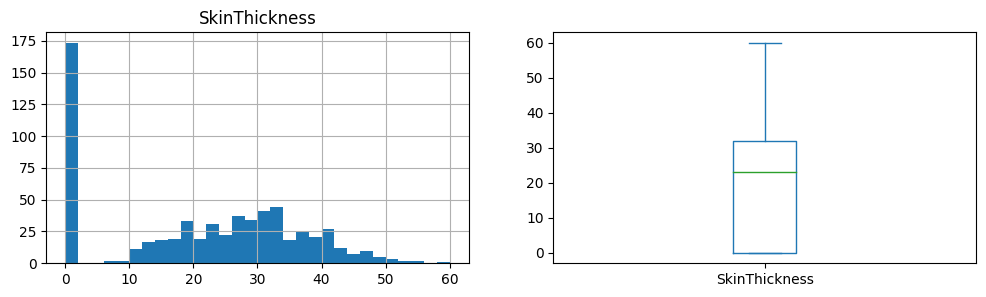

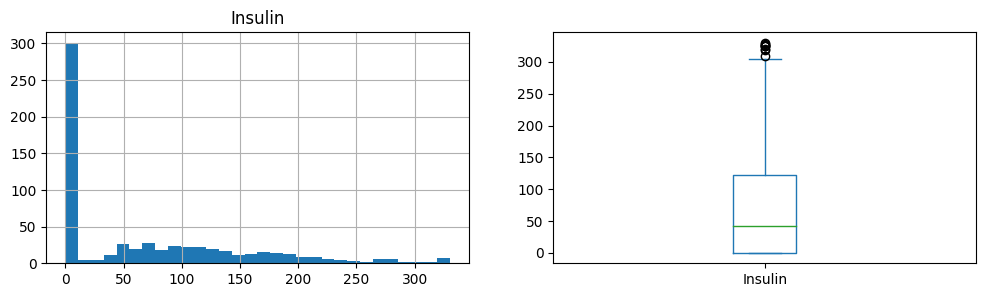

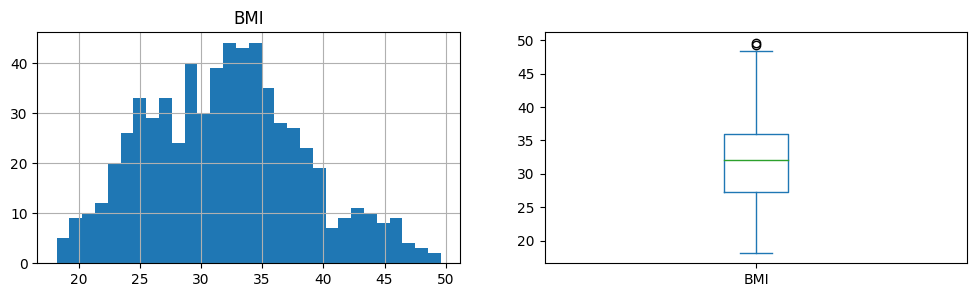

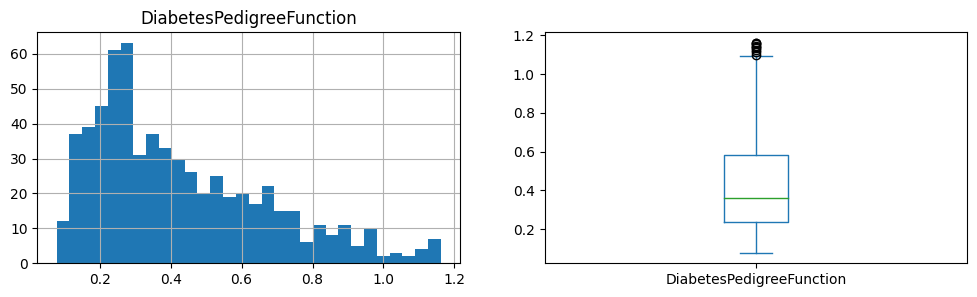

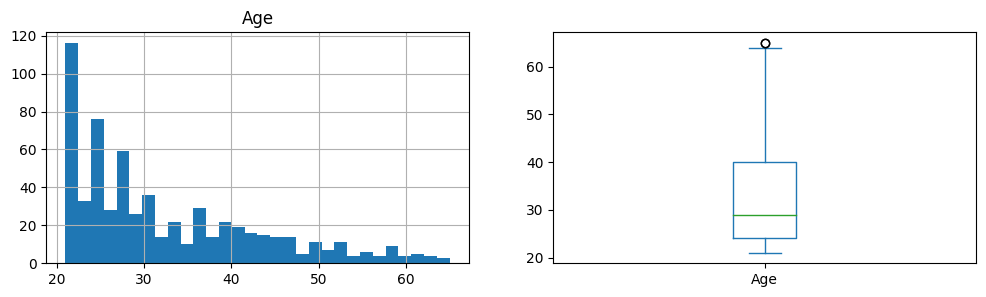

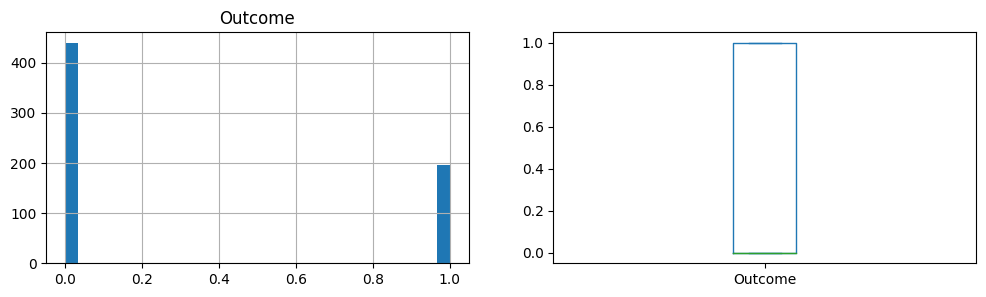

In [ ]:
for col in  df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 2, 1)
    df[col].hist(bins=30)
    plt.title(col)

    plt.subplot(1, 2, 2)
    df[col].plot(kind='box')

    plt.show()

## Feature Engineering

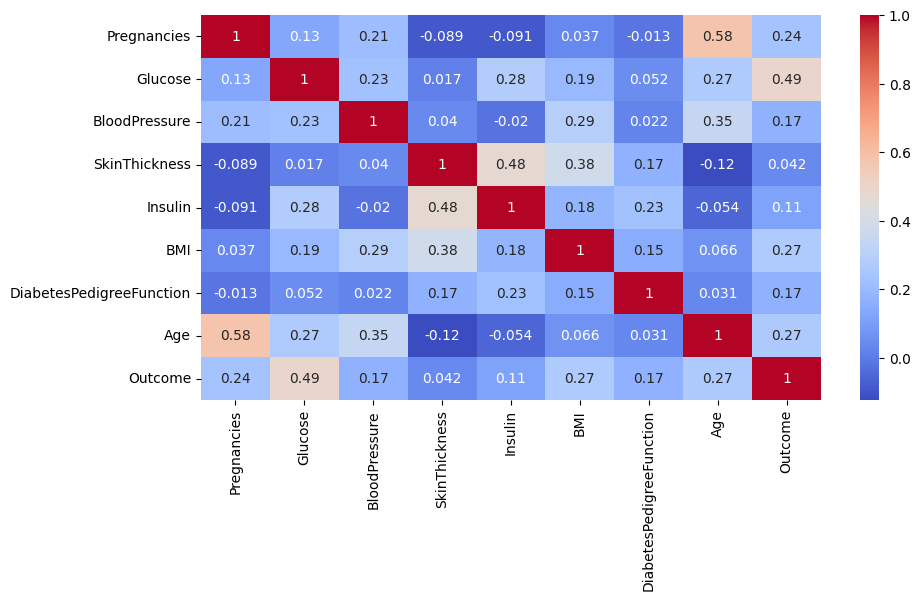

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap( df.corr(),annot=True, cmap='coolwarm')

plt.show()
#there is no strong relation amoung features

In [ ]:
x= df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
scaler = StandardScaler()  #Normalization of the data
x = scaler.fit_transform(x)

In [ ]:
print(y.value_counts())
print(y.value_counts(normalize=True))  #unbalanced data

Outcome
0    439
1    197
Name: count, dtype: int64
Outcome
0    0.690252
1    0.309748
Name: proportion, dtype: float64


In [ ]:
smote=SMOTE(random_state=42)
x,y=smote.fit_resample(x,y)

In [ ]:
print(y.value_counts())
print(y.value_counts(normalize=True))

Outcome
1    439
0    439
Name: count, dtype: int64
Outcome
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=42)

In [ ]:
x_test.shape,y_test.shape

((264, 8), (264,))

###Logistic Regression
*italicized text*

In [ ]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred = lr.predict(x_test)

In [ ]:
print( "Train Score" ,lr.score(x_train, y_train))
print( "Test Score" ,lr.score(x_test, y_test))

Train Score 0.8045602605863192
Test Score 0.7386363636363636


In [ ]:
cm=confusion_matrix(y_test,pred)
cm

array([[106,  31],
       [ 38,  89]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       137
           1       0.74      0.70      0.72       127

    accuracy                           0.74       264
   macro avg       0.74      0.74      0.74       264
weighted avg       0.74      0.74      0.74       264



<Axes: >

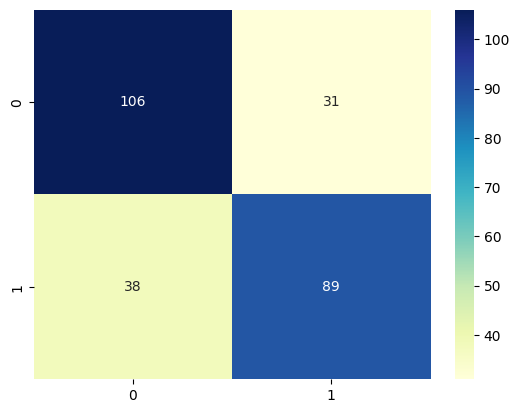

In [ ]:
sns.heatmap(cm, annot=True,fmt="g", cbar=True, cmap="YlGnBu")

###KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print('Train score:',knn.score(x_train,y_train))
print('Test  score:',knn.score(x_test,y_test))

Train score: 0.9022801302931596
Test  score: 0.7537878787878788


In [ ]:
knn_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,knn_pred)
cm

array([[ 94,  43],
       [ 22, 105]])

In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       137
           1       0.71      0.83      0.76       127

    accuracy                           0.75       264
   macro avg       0.76      0.76      0.75       264
weighted avg       0.76      0.75      0.75       264



<Axes: >

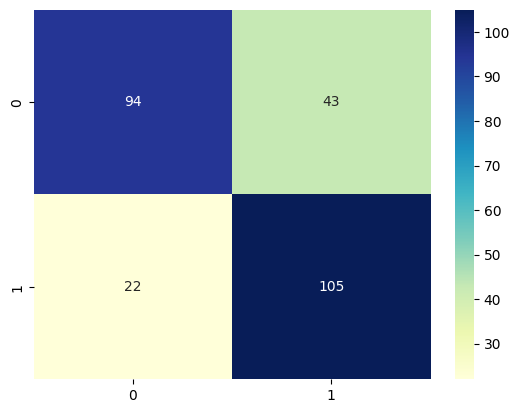

In [ ]:
sns.heatmap(cm, annot=True,fmt="g", cbar=True, cmap="YlGnBu")

###SVM

In [ ]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
print("Train Score:", svm_model.score(x_train, y_train))
print("Test Score:", svm_model.score(x_test, y_test))

Train Score: 0.7964169381107492
Test Score: 0.7159090909090909


In [ ]:
svm_pred = svm_model.predict(x_test)
cm=confusion_matrix(y_test,svm_pred)
cm

array([[98, 39],
       [36, 91]])

In [ ]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       137
           1       0.70      0.72      0.71       127

    accuracy                           0.72       264
   macro avg       0.72      0.72      0.72       264
weighted avg       0.72      0.72      0.72       264



<Axes: >

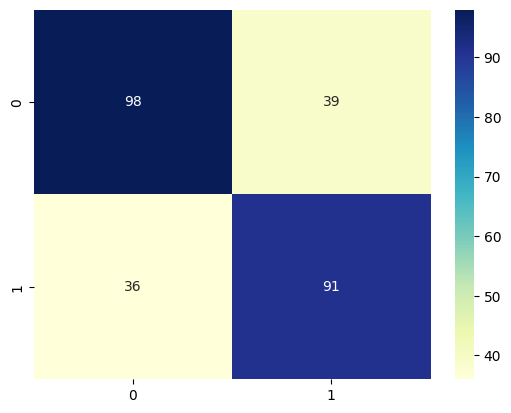

In [ ]:
sns.heatmap(cm, annot=True,fmt="g", cbar=True, cmap="YlGnBu")

###Decision Tree

In [ ]:
dt_limit= DecisionTreeClassifier(random_state=42, max_depth=3,min_samples_split=5,min_samples_leaf=5)  #To overcome overfiting
dt_limit.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [ ]:
print("Train accuracy:",accuracy_score(y_train, dt_limit.predict(x_train)))
print("Test accuracy :", accuracy_score(y_test, dt_limit.predict(x_test)))

Train accuracy: 0.7996742671009772
Test accuracy : 0.6704545454545454


In [ ]:
dt_pred = dt_limit.predict(x_test)
cm=confusion_matrix(y_test,dt_pred)
cm

array([[91, 46],
       [41, 86]])

In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68       137
           1       0.65      0.68      0.66       127

    accuracy                           0.67       264
   macro avg       0.67      0.67      0.67       264
weighted avg       0.67      0.67      0.67       264



<Axes: >

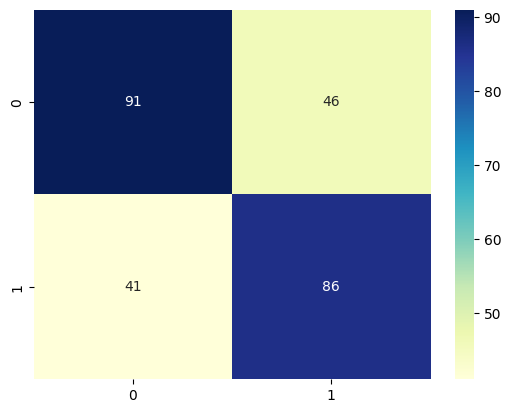

In [ ]:
sns.heatmap(cm, annot=True,fmt="g", cbar=True, cmap="YlGnBu")

##XGBoost

In [ ]:
model = XGBClassifier(max_depth=3,min_child_weight=3,gamma=3)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print("Train accuracy:",accuracy_score(y_train, model.predict(x_train)))
print("Test accuracy :", accuracy_score(y_test,model.predict(x_test)))

Train accuracy: 0.8583061889250815
Test accuracy : 0.7765151515151515


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[102,  35],
       [ 24, 103]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       137
           1       0.75      0.81      0.78       127

    accuracy                           0.78       264
   macro avg       0.78      0.78      0.78       264
weighted avg       0.78      0.78      0.78       264



<Axes: >

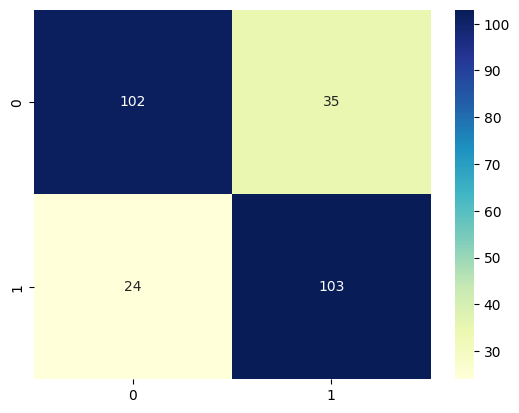

In [ ]:
sns.heatmap(cm, annot=True,fmt="g", cbar=True, cmap="YlGnBu")